In [33]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [34]:
#import Spain and US data
spain_df= pd.read_excel("data/Spain_Bretton_Woods_Data.xlsx", header = 1)
us_df = pd.read_excel("data/US_Bretton_Woods_Data.xlsx", header = 1)

In [35]:
#shorten column names and differentiate US data from Spain data
spain_df=spain_df.rename(columns={'Unnamed: 0':'Month','Economic Activity, Industrial Production, Index': 'Industrial_Production', 'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate':'Nom_Exchange_Rate', 'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar':
                      'Spain_International_Reserves', 'Prices, Consumer Price Index, All items, Index':'Spain_CPI'})
us_df=us_df.rename(columns={'Unnamed: 0':'Month', 'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar':
                      'US_International_Reserves', 'Prices, Consumer Price Index, All items, Index':'US_CPI'})

In [36]:
#merge Spain and US dataframes using month as key
sp_us_df=pd.merge(spain_df, us_df, on='Month')

In [37]:
#The monthly growth in the nominal exchange rate
sp_us_df['Nom_Exchange_Rate_Growth']=sp_us_df['Nom_Exchange_Rate'].pct_change()

#The real exchange rate
#Since the nominal exchange rate is in terms of US dollar, we divide by the CPI of Spain and multiply by the CPI of the US
sp_us_df['Real_Exchange_Rate']=sp_us_df['Nom_Exchange_Rate']*sp_us_df['US_CPI']/sp_us_df['Spain_CPI']

#The monthly growth in the real exchange rate
sp_us_df['Real_Exchange_Rate_Growth']=sp_us_df['Real_Exchange_Rate'].pct_change()

#The monthly inflation rate of Spain
sp_us_df['Spain_Inflation_Rate']=sp_us_df['Spain_CPI'].pct_change()

In [38]:
#The monthly growth in industrial production
sp_us_df['Industrial_Production_Monthly_Growth']=sp_us_df['Industrial_Production'].pct_change()

#The growth in industrial production versus 12 months ago
sp_us_df['Industrial_Production_Yearly_Growth']=sp_us_df['Industrial_Production'].pct_change(periods=12)

#An index of the value of Spain's international reserves (value of reserves at January 1960 = 100))
sp_us_df['Spain_International_Reserves_Index']=sp_us_df['Spain_International_Reserves']/sp_us_df['Spain_International_Reserves'][0]*100


In [39]:
#The monthly inflation rate of the US
sp_us_df['US_Inflation_Rate']=sp_us_df['US_CPI'].pct_change()

#An index of the value of the US's international reserves(value of reserves at January 1960 = 100))
sp_us_df['US_International_Reserves_Index']=sp_us_df['US_International_Reserves']/sp_us_df['US_International_Reserves'][0]*100

In [40]:
#change date format from string to datetime

dict={'Jan': 1,
      'Feb': 2,
      'Mar': 3,
      'Apr': 4,
      'May': 5,
      'Jun': 6,
      'Jul': 7,
      'Aug': 8,
      'Sep': 9,
      'Oct': 10,
      'Nov': 11,
      'Dec': 12}

months=[]

for i in range(len(sp_us_df)):
    str_month=sp_us_df['Month'][i].split(" ")[0]
    month=dict[str_month]
    year=int(sp_us_df['Month'][i].split(" ")[1])
    months.append(datetime.datetime(year, month, 1))

sp_us_df['Month']=months


<function matplotlib.pyplot.show(close=None, block=None)>

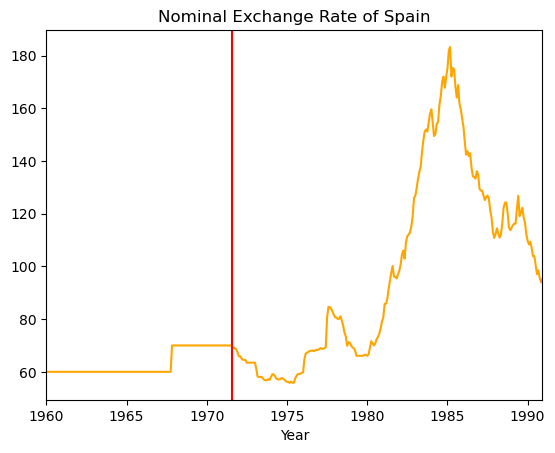

In [41]:
plt.plot(sp_us_df['Month'], sp_us_df['Nom_Exchange_Rate'], color='orange')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 12, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.xlabel('Year')
plt.title('Nominal Exchange Rate of Spain')
plt.savefig('figures/Nom_Exchange_Rate.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

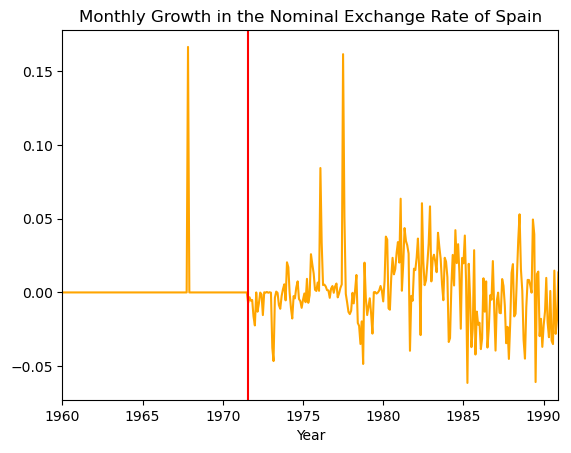

In [42]:
plt.plot(sp_us_df['Month'], sp_us_df['Nom_Exchange_Rate_Growth'], color='orange')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 12, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.xlabel('Year')
plt.title('Monthly Growth in the Nominal Exchange Rate of Spain')
plt.savefig('figures/Monthly_Growth_in_Nom_Exchange_Rate.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

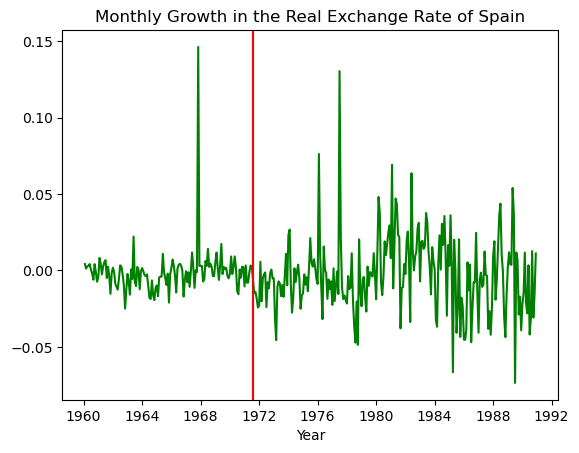

In [43]:
plt.plot(sp_us_df['Month'], sp_us_df['Real_Exchange_Rate_Growth'], color='g')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Monthly Growth in the Real Exchange Rate of Spain')
plt.xlabel('Year')
plt.savefig('figures/Monthly_Growth_in_Real_Exchange_Rate.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

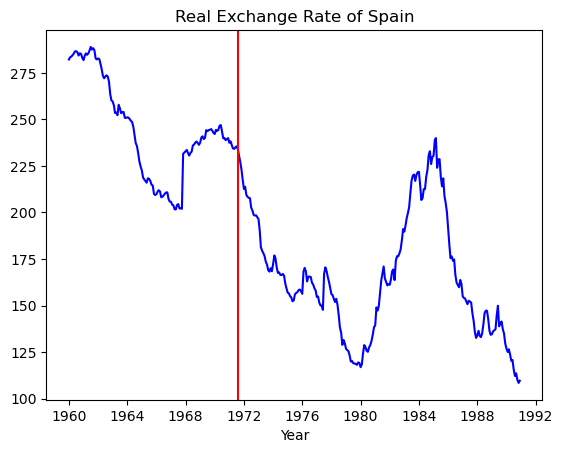

In [44]:
plt.plot(sp_us_df['Month'], sp_us_df['Real_Exchange_Rate'], color='b')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Real Exchange Rate of Spain')
plt.xlabel('Year')
plt.savefig('figures/Real_Exchange_Rate.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

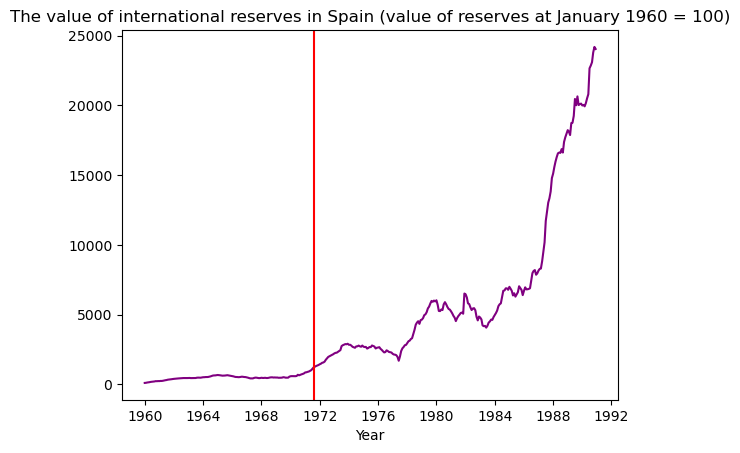

In [45]:
plt.plot(sp_us_df['Month'], sp_us_df['Spain_International_Reserves_Index'], color='purple')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('The value of international reserves in Spain (value of reserves at January 1960 = 100)')
plt.xlabel('Year')
plt.savefig('figures/Spain_International_Reserves_Index.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

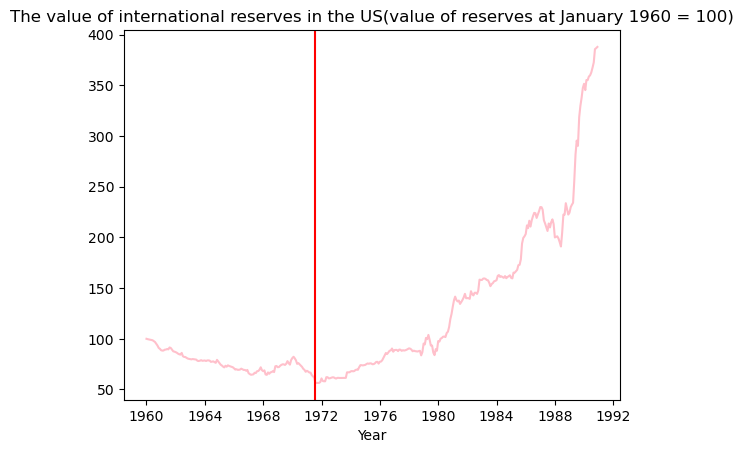

In [49]:
plt.plot(sp_us_df['Month'], sp_us_df['US_International_Reserves_Index'], color='pink')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('The value of international reserves in the US(value of reserves at January 1960 = 100)')
plt.xlabel('Year')
plt.savefig('figures/US_International_Reserves_Index.png')
plt.show

In [47]:
pd.options.display.max_rows = 999

In [48]:
sp_us_df

,Month,Industrial_Production,Nom_Exchange_Rate,Spain_International_Reserves,Spain_CPI,US_International_Reserves,US_CPI,Nom_Exchange_Rate_Growth,Real_Exchange_Rate,Real_Exchange_Rate_Growth,Spain_Inflation_Rate,Industrial_Production_Monthly_Growth,Industrial_Production_Yearly_Growth,Spain_International_Reserves_Index,US_Inflation_Rate,US_International_Reserves_Index
0,1960-01-01,NaN,60.000000,233.000000,2.857368,21478.100000,13.436946,NaN,282.153680,NaN,NaN,NaN,NaN,100.000000,NaN,100.000000
1,1960-02-01,NaN,60.000000,253.000000,2.855049,21395.700000,13.482806,0.000000,283.346534,0.004228,-0.000811,NaN,NaN,108.583691,0.003413,99.616353
2,1960-03-01,NaN,60.000000,299.000000,2.851573,21344.700000,13.482806,0.000000,283.691987,0.001219,-0.001218,NaN,NaN,128.326180,0.000000,99.378902
3,1960-04-01,NaN,60.000000,326.000000,2.853891,21278.000000,13.528666,0.000000,284.425709,0.002586,0.000813,NaN,NaN,139.914163,0.003401,99.068353
4,1960-05-01,NaN,60.000000,360.000000,2.845198,21234.300000,13.528666,0.000000,285.294743,0.003055,-0.003046,NaN,NaN,154.506438,0.000000,98.864890
5,1960-06-01,NaN,60.000000,406.000000,2.842878,21169.800000,13.574526,0.000000,286.495380,0.004208,-0.000815,NaN,NaN,174.248927,0.003390,98.564584
6,1960-07-01,NaN,60.000000,427.000000,2.841719,20999.400000,13.574526,0.000000,286.612290,0.000408,-0.000408,NaN,NaN,183.261803,0.000000,97.771218
7,1960-08-01,NaN,60.000000,455.000000,2.847516,20803.400000,13.574526,0.000000,286.028803,-0.002036,0.002040,NaN,NaN,195.278970,0.000000,96.858661
8,1960-09-01,NaN,60.000000,479.000000,2.864902,20430.000000,13.574526,0.000000,284.292960,-0.006069,0.006106,NaN,NaN,205.579399,0.000000,95.120146
9,1960-10-01,NaN,60.000000,527.000000,2.872438,20068.200000,13.666246,0.000000,285.462974,0.004116,0.002630,NaN,NaN,226.180258,0.006757,93.435639
